<a href="https://colab.research.google.com/github/dhruvprabhu/NLP_Project_R1/blob/main/NLPproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import string
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
#These are the python libraries used

In [3]:
nltk.download('stopwords')

nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
#To open the file
file = open(r"T.txt",encoding='utf-8')
listofwords = file.read().splitlines()
page_number_pattern = re.compile(r'\d+')
listofwords = [i for i in listofwords if i!='' and i!='The Hound of the Baskervilles' and i!='\x18'
               and not page_number_pattern.match(i) and i!='Download free eBooks of classic literature, books and'
               and i!='novels at Planet eBook. Subscribe to our free eBooks blog' and i!='and email newsletter.']
text = " ".join(listofwords)

In [5]:
#string which contains the punctuations which we want removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
processed_text = ""
for i in text:
    if i not in punctuations:
        processed_text = processed_text + i

#Making the result lowercase
processed_text = processed_text.lower()
substring_to_remove_1 = "free ebooks at planet ebookcom"
processed_text= processed_text.replace(substring_to_remove_1, "")
pattern = r'chapter \d+'
processed_text = re.sub(pattern, '', processed_text)
print(processed_text[:100])#print for 100 characters



the hound of the baskervilles by arthur conan doyle  mr sherlock holmes mr sherlock holmes who was u


Now tokenise the processed_text

In [6]:
tokenisedtext = word_tokenize(processed_text)
print(tokenisedtext[:10])

['the', 'hound', 'of', 'the', 'baskervilles', 'by', 'arthur', 'conan', 'doyle', 'mr']


In [7]:
# Stop words need to be removed.
stop_words = set(stopwords.words('english'))
final_tokens = [i for i in tokenisedtext if not i in stop_words]
finaltext = "  "
finaltext = finaltext.join(final_tokens)
print(finaltext[:100]) #after removing stopwords

hound  baskervilles  arthur  conan  doyle  mr  sherlock  holmes  mr  sherlock  holmes  usually  late


In [8]:
#Frequency Distrubution
freq_dist=nltk.FreqDist(finaltext)
print(freq_dist.most_common(15))
freq_dist=list(freq_dist)

[(' ', 53174), ('e', 19612), ('r', 11212), ('a', 11147), ('n', 11044), ('s', 10998), ('o', 10779), ('t', 10657), ('i', 9839), ('l', 8490), ('d', 7595), ('c', 5184), ('u', 5012), ('h', 4937), ('m', 4586)]


In [9]:
import seaborn as sb
sb.set(style='darkgrid')
dataf=pd.DataFrame(tokenisedtext)

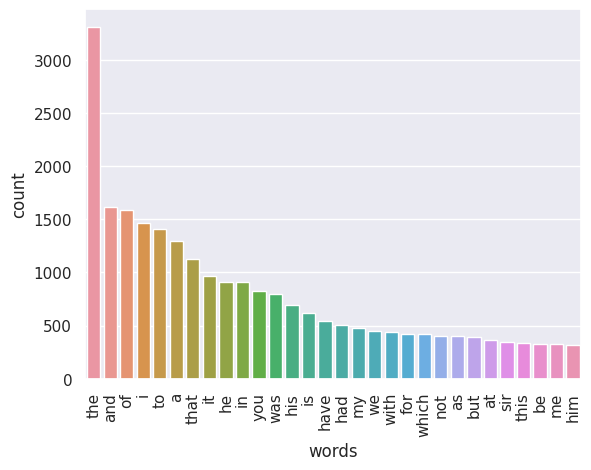

In [10]:
sb.countplot(x=dataf[0],order=dataf[0].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.xlabel('words')
plt.show()
#Plotting the counts of the most frequent words ordered in descending order of their frequencies.

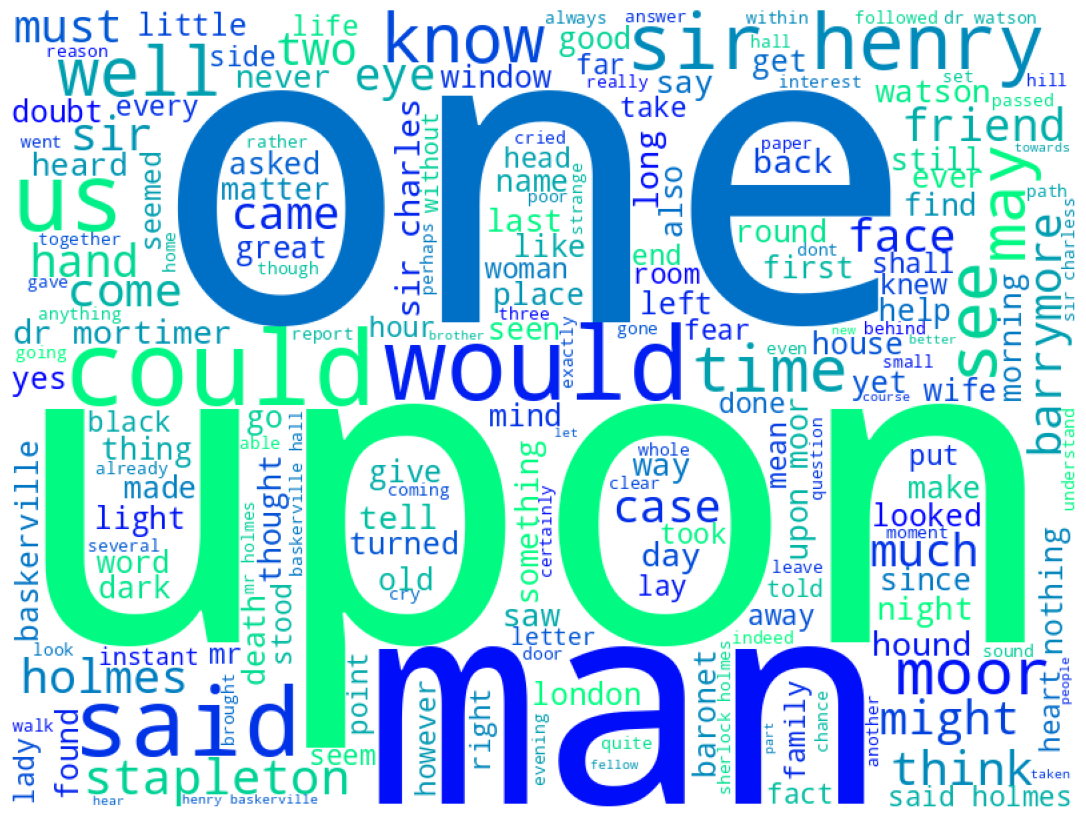

In [11]:
# Word cloud
wc = WordCloud(width = 800, height = 600,
                background_color ='white',
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext)

plt.figure(figsize = (12,8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [12]:
nltk.download("treebank")
pos_tags = nltk.pos_tag(final_tokens)
print(pos_tags[:20])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


[('hound', 'NN'), ('baskervilles', 'NNS'), ('arthur', 'VBP'), ('conan', 'JJ'), ('doyle', 'JJ'), ('mr', 'NN'), ('sherlock', 'NN'), ('holmes', 'NNS'), ('mr', 'VBP'), ('sherlock', 'JJ'), ('holmes', 'NNS'), ('usually', 'RB'), ('late', 'JJ'), ('mornings', 'NNS'), ('save', 'VBP'), ('upon', 'IN'), ('infrequent', 'JJ'), ('occasions', 'NNS'), ('night', 'NN'), ('seated', 'VBN')]


In [13]:
from collections import Counter
counts = Counter( tag for word,  tag in pos_tags)
print(counts)

Counter({'NN': 8645, 'JJ': 4981, 'VBD': 2270, 'NNS': 2106, 'RB': 1976, 'VB': 1043, 'VBP': 1037, 'VBN': 893, 'VBG': 844, 'IN': 773, 'MD': 716, 'CD': 407, 'VBZ': 298, 'PRP': 182, 'JJR': 90, 'DT': 80, 'JJS': 73, 'RBR': 65, 'RP': 38, 'NNP': 12, 'WP$': 9, 'WDT': 9, 'WP': 9, 'FW': 8, 'UH': 8, 'CC': 8, 'RBS': 3, '$': 2, 'WRB': 2, 'PRP$': 1})


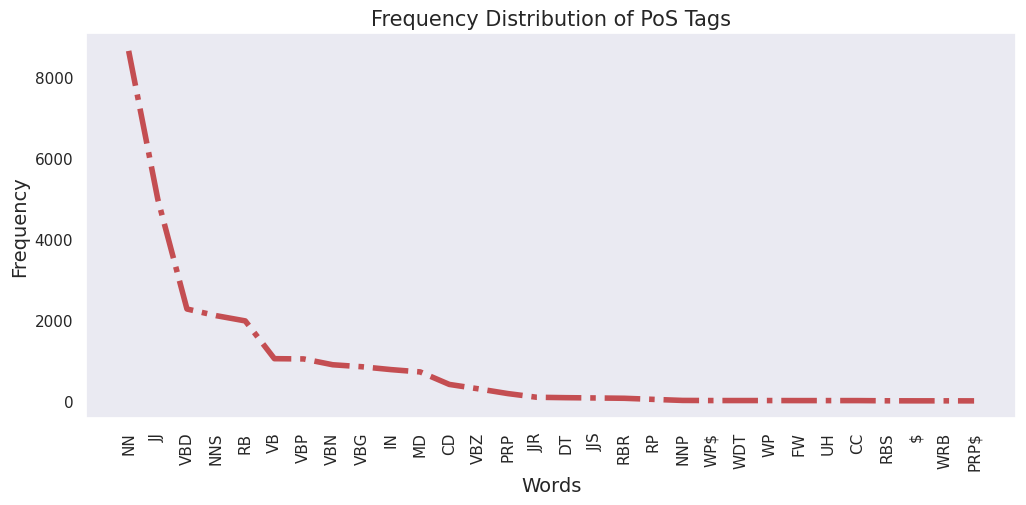

In [14]:
#Frequency Distribution of varios PoS Tags

pos_tags_freq = nltk.FreqDist(counts)
pos_tags_freq = {k: v for k, v in sorted(pos_tags_freq.items(), key=lambda item: item[1],reverse=True)}
x = list(pos_tags_freq.keys())[:40]
y = list(pos_tags_freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Frequency Distribution of PoS Tags',size=15)
plt.xlabel('Words',size=14)
plt.ylabel('Frequency',size=14)
plt.show()


We will now process the largest chp C.txt

In [15]:
from nltk import bigrams, FreqDist
file = open(r"C.txt",encoding='utf-8')
list_of_chp = file.read().splitlines()
page_number_pattern = re.compile(r'\d+')
list_of_chp = [i for i in listofwords if i!='' and i!='The Hound of the Baskervilles' and i!='\x18' and not page_number_pattern.match(i)]
text = " ".join(listofwords)

punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
change_txt = ""
for i in text:
    if i not in punctuations:
        change_txt = change_txt + i

#to make the result lowercase
change_txt = change_txt.lower()
substring_to_remove_1 = "free ebooks at planet ebookcom"
change_txt= change_txt.replace(substring_to_remove_1, "")
pattern = r'chapter \d+'
change_txt = re.sub(pattern, '', change_txt)

tokens = word_tokenize(change_txt)


# Generate bigrams
bigram_tuples = list(bigrams(tokens))

# Count bigram frequencies
bigram_freq = FreqDist(bigram_tuples)

# Create a bigram probability table
bigram_probabilities = {}

for bigram in bigram_freq:
    preceding_word, following_word = bigram
    if preceding_word not in bigram_probabilities:
        bigram_probabilities[preceding_word] = {}

    probability = bigram_freq[bigram] / tokens.count(preceding_word)
    bigram_probabilities[preceding_word][following_word] = probability


# Create a counter for preceding words
preceding_word_count = 0
#bigram probability table displayed for 5x5
for preceding_word in bigram_probabilities:
    if preceding_word_count < 5:

        following_word_count = 0
        for following_word, probability in bigram_probabilities[preceding_word].items():
            if following_word_count < 5:
                print(f"{preceding_word}, {following_word}, Probability : {probability:.4f}")
                following_word_count += 1
        preceding_word_count += 1



of, the, Probability : 0.2708
of, his, Probability : 0.0579
of, a, Probability : 0.0535
of, it, Probability : 0.0315
of, my, Probability : 0.0252
in, the, Probability : 0.2750
in, a, Probability : 0.0759
in, his, Probability : 0.0649
in, my, Probability : 0.0385
in, this, Probability : 0.0330
it, was, Probability : 0.1746
it, is, Probability : 0.1601
it, i, Probability : 0.0269
it, and, Probability : 0.0258
it, would, Probability : 0.0217
i, have, Probability : 0.0997
i, had, Probability : 0.0689
i, am, Probability : 0.0546
i, was, Probability : 0.0539
i, could, Probability : 0.0505
the, moor, Probability : 0.0420
the, man, Probability : 0.0145
the, same, Probability : 0.0112
the, baronet, Probability : 0.0112
the, matter, Probability : 0.0106


In [16]:
import random

# Now we play Shannon's game
sentences = [
    ("in some ways they have within the last fortyeight",  # Expected next word: "hours"
     "hours"),
    ("window would serve the",  # Expected next word: "purpose"
     "purpose"),
    ("i can hardly imagine how",  # Expected next word: "he"
     "he"),
    ("but whatever the true explanation of",  # Expected next word: "Barrymore’s"
     "Barrymore’s"),
    ("after the conversation which I",  # Expected next word: "have"
     "have"),
    ("it put me in a most awkward",  # Expected next word: "position"
     "position"),
    ("i imagined what my feelings",  # Expected next word: "would"
     "would"),
    ("hurried along the road at the top",  # Expected next word: "of"
     "of"),
    ("it was Stapleton with his",  # Expected next word: "butterfly-net"
     "butterfly-net"),
    ("stapleton was the cause of the",  # Expected next word: "interruption"
     "interruption")
]

correct_predictions = 0

for sentence, expected_next_word in sentences:
    words = sentence.lower().split()  # Tokenize the given sentence

    current_word = words[-1]  # Take the last word as the current word

    if current_word in bigram_probabilities:
        next_word = random.choices(
            list(bigram_probabilities[current_word].keys()),
            weights=list(bigram_probabilities[current_word].values())
        )[0]
    else:
        # If the current word doesn't have associated bi-grams, choose a random word
        next_word = random.choice(list(bigram_probabilities.keys()))

    if next_word == expected_next_word:
        correct_predictions += 1

    generated_sentence = ' '.join(words + [next_word])
    print(f"Generated: {generated_sentence}, Expected: {expected_next_word}")

accuracy = (correct_predictions / len(sentences)) * 100
print(f"Accuracy: {accuracy:.2f}%")


Generated: in some ways they have within the last fortyeight hours, Expected: hours
Generated: window would serve the first, Expected: purpose
Generated: i can hardly imagine how he, Expected: he
Generated: but whatever the true explanation of any, Expected: Barrymore’s
Generated: after the conversation which i held, Expected: have
Generated: it put me in a most awkward position, Expected: position
Generated: i imagined what my feelings in, Expected: would
Generated: hurried along the road at the top of, Expected: of
Generated: it was stapleton with his black, Expected: butterfly-net
Generated: stapleton was the cause of the terrible, Expected: interruption
Accuracy: 40.00%
